# Machine Learning Exercise - Univariate and Multivariate Linear Regression


In this jupyter notebook, we will be implementing univariate and multivariate linear regression for two different data sets using Pytorch, some numpy, and a touch of scikit learn. Linear regression basically means trying to do continuous value prediction using a linear model, or trying to draw the best possible line we can to fit a dataset. "best line" just means a line that is as close as possible to all the data. In this notebook, we will discuss the logic, the math, and the code in detail, so I hope you find it helpful.

## Univariate Linear Regression

Let's suppose we are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and we have data for profits and populations from the cities. We want to use this data to select which city to expand to next. The data is contained in the file ex1data1.txt. The first column is population in thousands of people and the second is profit in thousands of dollars. We want to use the population data to predict profit.


Let's start by importing some libraries and examining the data.
Torch (Pytorch) will be used for math and data manipulation.
matplotlib has function called 'pyplot' which we will use for the plotting of figures and we will call it 'plt'.
The reason we use only part of matplotlib is because we don't need the whole library. 
Importing the whole library is bad coding practice because it loads too much into memory, creates dependencies we may
be unaware of, and gives us access to functions we may not need/want/be aware of. Finally, we will use pandas, aliased as 'pd', just to have a nice way to look at the data.

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's now change our dataframe objects into torch tensors and plot the data. Below, "view" is allows us to manipulate the shape of our tensors. In this case, I am simply reshaping them into vectors.

Text(0.5, 1.0, 'Restaurant Data')

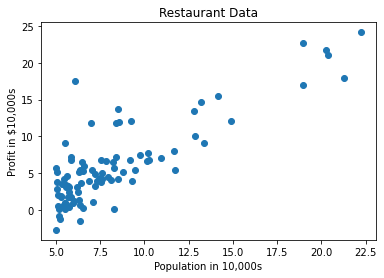

In [4]:
X = torch.Tensor(data['Population']).view(len(data['Population']), 1)
y = torch.Tensor(data['Profit']).view(len(data['Profit']), 1)
plt.scatter(X, y)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Restaurant Data')

Now that we know what the data looks like, let's examine the $X$ and $y$ object constructed above.

In [5]:
#confirm shape of variable objects, our vectors
print("X shape: {}".format(X.size()))
print("y shape: {}".format(y.size()))

X shape: torch.Size([97, 1])
y shape: torch.Size([97, 1])


Cool! In the above objects, $X$ is called a feature matrix, though techincally for now it is only a vector, a feature vector. The word "feature" is machine learning terminology for independent variable. $y$ is the target vector and contains the answers we are hoping to model. In this case, $X$ is population and $y$ is profit.


The rows of the feature matrix $X$ are individual examples from the dataset. Each row can be thought of as a vector, and, by stacking each example or row together, we can compose the matrix, $X$. We denote an individual row of the matrix in vector notation, namely, $x$. Each row corresponds to an element contained in $y$

Let's now consider our loss function denoted by $\mathcal{L}$. For linear regression, we use what is called the squared loss function defined below as
             $$ {\mathcal{L}(\hat{y}^{(i)}, y^{(i)})} = ( \hat{y}^{(i)} - y^{(i)})^2 $$

where $\hat{y}$ is the linear model defined as $$ \hat{y} = w^Tx+b = w_1 x_1 + w_2 x_2 + ... +  w_n x_n + b = \sum_{i=1}^{n}w_ix_i + b $$


###### Note: The superscript $a^{(i)}$ is used to index into the dataset. For example, $x^{(i)}$ and $y^{(i)}$ respectively denote the $i$th $x$ vector and the $i$th $y$ value associated with that $x$ vector.  $\hat{y}^{(i)}$ is then the model's prediction for the $i$th $x$ vector. Concretely, $x^{(3)}$, $y^{(3)}$,   $\hat{y}^{(3)}$ are respectively the 3rd feature vector, the 3rd label, and our prediction for the 3rd feature vector. Meanwhile,. the subscript, $a_i$, denotes a given feature. In the univariate case, we have only one feature, but this notation is easily generalized to the case where the number of features, n, is greater than 1, that is, the multivariate case.

We use ${\mathcal{L}}$ to measure our model's performance relative to a given example as $ {\mathcal{L}}$ computes the difference between $\hat{y}^{(i)}$, our model's guess, and the correct answer, $y^{(i)}$.

However, we don't just want to consider our model's performance on a single example. Instead, we want a number to measure performance on the entire dataset. It would then be reasonable to consider the average error over all our data points. This is called the cost function, denoted by $J$.

#### $$ {J(w, b)} = \frac{1}{2m}\sum_{i=1}^{m} {\mathcal{L}(\hat{y}^{(i)}, y^{(i)})} $$

In the above equations, $w$ is called a parameter/weight vector. The parameters/weight of our model are simply numbers we multiply the values of $X$ by to try to predict $y$. By changing these parameters/weights we can improve (or worsen) how well we predict $y$. $b$ is another parameter of the model and is known as the intercept or bias term. This term is simply a constant that gives our model the flexibility of not necessarily passing through the origin when making a prediction. It is our goal to try to find the best values for $w$ and $b$. 

The cost function $J$ takes the elements of $w$ and $b$, plugs them into our model, $\hat{y}$, and measures the difference between what our model predicts for a given $x$ feature vector, $x^{(i)}$, and a given $y$, $y^{(i)}$. We then square this difference to remove any negative values and sum all the squares. We multiply this value by $1/2m$ to make it an average and to make the math a little easier when we start taking derivatives. $n$ is the number of features we are considering and is therefore the number of columns in $X$ and the number of elements in $w$. Finally, $m$ denotes the total number of examples in the dataset. In this case, $n = 1$ and $m = 97$. In general, $X$ is an $mxn$ matrix, so $97x1$ here. 

We then use $J$ to evalute values we might choose for $w$ and $b$, the parameters/weight of our linear regression model.


###### Remark:

You might wonder why we chose $\mathcal{L}$ and $J$ in this way.  $\mathcal{L}$ is commonly used in science and is known as squared error. In machine learning, squared error arises from two fundamental assumptions: 1) Use the generalized linear models (GLM) framework to model a problem, and 2) $y$ is distributed according to a Gaussian. Under GLM and the second assumption, squared error is a natural choice. In this framework, then,  $ \mathcal{L}$ is known as the link function. Recognize also that $J$ is the mean of $ \mathcal{L}$, that is, the mean squared error. 


###### Note: In the univariate case, $X$, is a mx1 matrix, a vector. However, it will be helpful later to think of $X$ as a matrix.
###### Note: In the univariate case, $w$, is a 1x1 vector, a scalar. However, it will be helpful later to think of $w$ as a vector.

Let's code it up! We can start by creating a function, a group of code we plan to use later, and pass it $X$ and $y$. We should also set up a default $w$, which will be a vector with dimensionality equivalent to the number of columns $X$ has. We can automatically obtain $m$ by accessing the size of $y$. $\hat{y}$ can be created by recognizing that $w^Tx+b$ is just the dot product of $w$ and $x$ with $b$ addded on, which torch is happy to calculate for us. The calculation of $J$ then follows from squaring the difference between $\hat{y}$ and $y$, summing that up over all of data, and multiplying that by $1/2m$. We then tell the function to return $J$, which by the end of all that math is just a number.


### Vectorization for speed

Unfortunately, for loops are slow when we're dealing with a lot of data, so it's good practice in machine learning to use vectorization to speed up our code. This simply means using linear algebra, in our case matrix multiplication in torch, instead of a for loop wherever possible. Consider the following:


$X : (mxn)$ -- matrix

$y : (mx1)$ -- column vector

$w : (nx1)$ -- column vector

Let's use matrix multiplication to our advantage and speed up our code with a linear algebra library, like torch or numpy, which is optimized for fast computation. We can then redefine our model as

$ \hat{y} = Xw+b$  -- column vector: $(mx1)$

###### Note: $b$ is still a scalar that gets added on to each element of the vector resulting from $Xw$.  Alternatively, you can think of $b$ as an $(mx1)$ column vector where each element is the same.

We can now see $\mathcal{L}$ and $J$ in a new light, where we respectively squaring the differences between two vectors... 


$ {\mathcal{L}(\hat{y}, y)} = ( \hat{y} - y)^2 $ -- column vector: $(mx1)$

... summing of all the elements of the resulting vector, and multiplying by the familiar $\frac{1}{2m}$.

$ {J(w, b)} = \frac{1}{2m}\sum_{i=1}^{m} {\mathcal{L}(\hat{y}^{(i)}, y^{(i)})} $ -- scalar

I hope it is clear that an unvectorized and a vectorized implementation are equivalent; a vectorized implementation is just much faster.

Typical practice is to intialize $w$ as a vector of zeros and $b$ to zero as well. In other words, what would our cost be if all our parameters were simply zero?

In [6]:
def computeCost(X, y, b=0, w=torch.zeros((1, 1))):
    if w.shape[1] != X.shape[1]:
        w = torch.zeros(X.shape[1],1)
    
      
    m = y.size()[0]
    y_hat = torch.matmul(X, w) + b
    L = (y_hat - y)**2
    J = 1 / (2 * m) * torch.sum(L)
    
    return J.item()

We can now evalute our initial guess of $w$ and $b$ being zero using the our cost function J.

In [7]:
computeCost(X, y)

32.072731018066406

This value is quite high which means our current guess could be improved a lot. That means we need to change the values of $w$ and $b$. But how can we do that? We will use an iterative algorithm known as gradient descent.

#### Gradient Descent Algorithm

#####  repeat until convergence {
#### $$ w_{j} := w_{j} - \alpha\frac{\partial J(w, b)}{\partial w_{j}} $$
#### $$ b := b - \alpha\frac{\partial J(w, b)}{\partial b} $$
##### }

#### where $$ \frac{\partial J(w, b)}{\partial w_{j}} =  \frac{1}{m}\sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)})x^{(i)}_{j} $$
#### and $$ \frac{\partial J(w, b)}{\partial b} =  \frac{1}{m}\sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)}) $$

On each iteration of gradient descent, we are updating the values of $w$ and $b$ by respectively subtrating off $\alpha\frac{\partial J(w, b)}{\partial w_{j}} $ and $\alpha\frac{\partial J(w, b)}{\partial b} $ from their current values. If you're unfamiliar with calculus, a derivative or partial derivative is the slope of a function, or how a function changes, when considering a given varible. By using gradient descent, we are harnessing the partial derivatives of $J$ to guide us toward our cost function's global minimum. Note that we are multiplying the parital derivative terms by $\alpha$ above. $\alpha$ is known as the learning rate. The value of the learning rate determines how aggressive our approach is; a high learning rate will descend the gradient very quickly, while a low learning rate will descend the gradient slowly. A high learning rate, however, runs the risk of diverging, so the value of $\alpha$ must be chosen with care. It turns out that choosing the learning rate happens to be one of the most important modeling choices we can make. We will return to this topic in the future.

Gradient descent repeats the math above until we reach the minimum, or converge, or until we decide to stop. The square error cost function, $J$, happens to be a convex function. This means gradient descent will always converge to the global minimum rather than a local minimum that might occur in a non-convex function. It is worth mentioning that our derivative terms are also averages, the average derivative of the cost with respect to a given parameter.

### Gradient Descent Vectorization

We need to vectorize gradient descent as well, namely, $ \frac{\partial J(w, b)}{\partial w}$, as this can be a vector of varying length while $ \frac{\partial J(w, b)}{\partial b}$ will only ever be a scalar. Note, however, that $\hat{y}$ and $y$ are $(mx1)$ column vectors below.

$ \frac{\partial J(w, b)}{\partial w} =  \frac{1}{m} X^T( \hat{y} - y) $ -- column vector:  $(nx1)$

$ \frac{\partial J(w, b)}{\partial b} =  \frac{1}{m}\sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)}) $ -- scalar

Now with the math out of the way, we can set up the $\alpha$ value we want to use and the number of times we will repeat gradient descent. Let's use the following abritrary choices:

In [8]:
alpha = 0.01
iters = 1500

Now we just need to code up a function to perform gradient descent and update $w$ and $b$. We will first pass this function $X$, $y$, $\alpha$, and iters. Iterations is the number of times we will perform gradient descent on the data. We should again generate the dimensions of $w$ automatically based on the number of columns the matrix $X$ has. Why? The dimensionality of $X$ could change, so we want the program to adapt to this change automatically. To make our implementation as efficient as possible, we will use a vectorized approach. This means using linear algebra to perform multiplications rather than using for-loops because linear algebra libraries, in this case torch, perform much faster than a for-loop.

Let's also create some empty lists, called cost, ws, and bw, store the values of our cost function and parameters on each pass of gradient descent. By doing this and storing these values based on the iteration number, we can then see if and how gradient descent is reducing our cost function, $J$.

After completing gradient descent, our function will return our updated parameter values, $w$ and $b$, which will then allow us to draw our line.

In [9]:
def gradientDescent(X, y, alpha, iters):
    w = torch.zeros((X.shape[1], 1))
    b = 0
   
    m = len(y)
    cost, ws, bs = [], [], []
    for i in range(iters):
        y_hat = torch.matmul(X, w) + b
        if w.size()[1]== 1:
            ws.append(torch.squeeze(w))
            bs.append(b)
        w = w - alpha * (1 / m) * (torch.matmul(X.T, (y_hat - y)))        
        b = b - alpha * (1 / m) * torch.sum(((y_hat - y)))
        cost.append(computeCost(X, y, b, w))
    return w, b, cost, ws, bs

Now let's run the gradient descent algorithm to fit our parameters to the training set.

In [10]:
new_w, new_b, cost, ws, bs = gradientDescent(X, y, alpha, iters)
print("Optimized w: {}".format(new_w.item()))
print("Optimized b: {}".format(new_b))

Optimized w: 1.1663624048233032
Optimized b: -3.6302924156188965


Finally we can compute the cost (or the loss or the error) of the trained model using our fitted parameters.

In [11]:
print('Cost after optimizing parameters: {}'.format(computeCost(X, y, new_b, new_w)))

Cost after optimizing parameters: 4.4833879470825195


4.483 is much better than 32.07!

We went to a lot of effort in order to understand the ins and outs of linear regression, but torch actually has all the functions we just coded up, computecost, gradientdescent, etc, built in and ready for use. Let's use torch's implementaion and compare it to our own. We'll need to use torch's neural network (nn) module and build a class to conform torch's convention. The specificity of the code below may seem strange, but using these torch training conventions now in the simple linear regression case will make coding more complicated models, like neural networks, easier to understand in the future.

In [12]:
import torch.nn as nn
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class LinReg(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.linear = nn.Linear(self.input_size, self.output_size)
    
    def forward(self, x):
        x = self.linear(x)
        return x
lin_reg = LinReg(X.shape[1], 1)
lin_reg = lin_reg.to(device)

The input size is the number of features we are considering and the output size is simply 1 as we trying to predict a scalar value, $y$. linear is equivalent to $\hat{y}$. So, in our constructor, we set up the variables and functions we need and then we use them in our forward module. "forward" refers to forward propagation which simply means computing $\hat{y}$. Finally, we can set up and send our model to the gpu if it is available to speed up computation.

To make use of the full funtionality of torch, it's best to use torch's data wrangling functionality as well. Again, the code below may seem unnecessary or strange, and it kind of is, but it's good to practice it now in this simple case. TensorDatasets package our $y$ and $X$ into one convenient object and DataLoaders are iterators that let us look at our data one batch at a time. For now, one batch is simply our entire dataset.

In [13]:
from torch.utils.data import DataLoader, TensorDataset
def torch_dataset(X, y):
    dataset = TensorDataset(X, y)
    loader = DataLoader(dataset, batch_size = X.shape[0])
    return loader
restaurant_loader = torch_dataset(X, y)

With our model and data ready, we can set up our cost function. Let's use mean squared error (MSE) again and optimize our parameters with gradient descent (SGD). We don't have to code these up from scratch again because torch has them ready to go. We just need to pass the optimizer our parameters and specify a learning rate.

In [14]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(lin_reg.parameters(), lr = alpha)

Let's write up a training function which optimizes our parameters based on the model, data, loss function, and parameters we send it. The outer loop is the same as above. The second for statement is actually unnecessary as we aren't using batches here, but it conforms to torch convention, so let's use it. We pass $X$ through our model, compute the cost relative to our model's prediction and $\hat{y}$, take the derivative, and then use gradient descent to optimize our parameters. That is all that is happening in train function with a little extra torch flair.

In [15]:
def train(model, loader, criterion, optimizer):
    costs = []
    model.train()
    for epoch in range(iters):
        cost = 0.0
        for output, target in loader:
            output, target = output.to(device), target.to(device)
            output = model(output)
            loss = criterion(output, target)
            cost += loss.item()
            costs.append(cost)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    return costs

Let's see how this goes.

In [16]:
%%time
rest_cost = train(lin_reg, restaurant_loader, criterion, optimizer)

Wall time: 3.05 s


Great! Now we can access our model's optimized parameter by storing them in a list.

In [17]:
params = []
for param in lin_reg.parameters():
    params.append(param)

We're almost ready to draw some lines.

To draw our lines, we use torch.linspace to generate 100 linerally spaced values over our $x$ interval, city population. 

We can then just compute $\hat{y}$ with our optimized parameter values for each value on the interval

In [18]:
x_line = torch.linspace(X.min(), X.max(), len(X)).reshape(len(X), 1)
y_line = (new_w * x_line) + new_b

Now we can finally draw our line! Let's also compare our fit with Scikit-learn's (SL) implementation of linear regression. We will use .ravel() to essentially transform $y$ from a column vector into an array as this is the format SL expects. Then we will just access their bias term and slope and compare it to ours, multiplying both by the same x interval.

#### Plotting note:
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
Having fig is useful if you want to change figure-level attributes or save the figure as an 
image file later (e.g. with fig.savefig('yourfilename.png'). 
You certainly don't have to use the returned figure object but many people do use it later so 
it's common to see. 
Also, all axes objects (the objects that have plotting methods (functions that are members of a class)), 
have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()

ax = fig.add_subplot(111)

111 means 1x1 grid, first subplot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

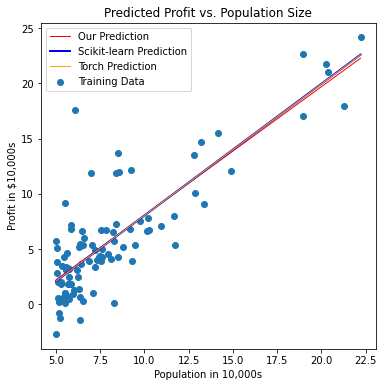

In [19]:
from sklearn import linear_model
import numpy as np
lr = linear_model.LinearRegression()
lr.fit(np.array(X), np.array(y).ravel())
fig, ax = plt.subplots(figsize=(6,6))
x_line = np.array(x_line)
ax.plot(x_line, y_line, 'r', linewidth=1.0, label='Our Prediction')
ax.plot(x_line, lr.intercept_+ lr.coef_* x_line, 'b', linewidth = 2.0, label = 'Scikit-learn Prediction')
ax.plot(x_line, x_line*params[0].item() + params[1].item(), 'orange', linewidth=1.0, label= 'Torch Prediction')
ax.scatter(X, y, label='Training Data')
ax.legend()
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')

As you can see above, our prediction is almost identical to SL's prediction, which is identical to torch's prediction. The three would be identical if we were to play with our hyperparameter choices, namely number of iterations. We will discuss strategies for tuning these hyperparameters in the future.

Let's take a moment and further reflect on the plot below considering how the prediction changes at each iteration based the updates to our parameters, $w$ and $b$. Notice, for instance, that values of $w$ and $b$ change less as the number of iterations increases. Why do you suppose that is?

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

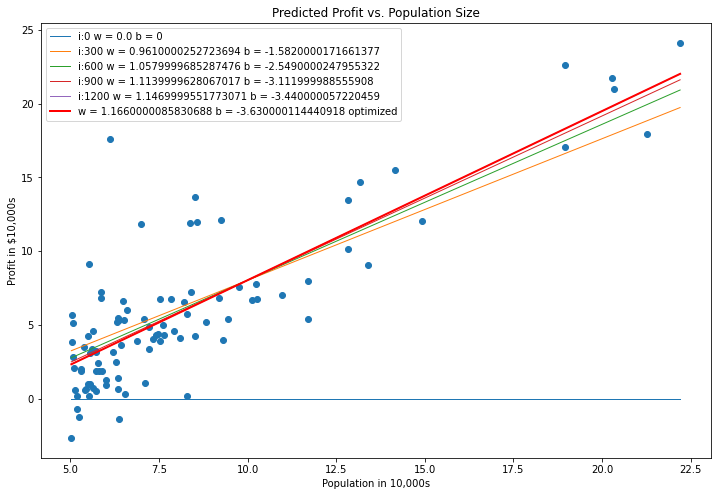

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range(iters):
    new_w = ws[i]
    new_b = bs[i]
    if i%300 == 0:        
        y_line = (new_w * x_line) + new_b
        ax.plot(x_line, y_line, linewidth=1.0, label='i:{} w = {} b = {}'
                    .format(i, np.round(new_w,3), np.round(new_b,3)))
    if i+1 == iters:
        ax.plot(x_line, y_line, linewidth=2.0, c='r',label='w = {} b = {} optimized'
                .format(np.round(new_w,3), np.round(new_b,3)))
ax.scatter(X, y)
ax.legend()
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')

Since our gradient descent function also outputs an array of the cost function's value at each training iteration, we can plot that as well to confirm that our cost function decreases on each iteration of gradient descent.

Text(0.5, 1.0, '$J$ decreases on each iteration')

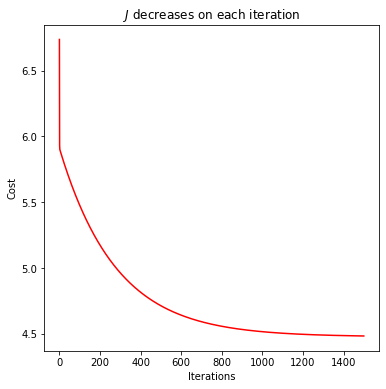

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
#arange returns evenly spaced values within a given interval, in this case iters, 1500.
ax.plot(np.arange(iters), cost, 'red')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title(r'$J$ decreases on each iteration')

To help give better intuition about descending the gradient of the cost function and arriving at a minimum, you can take a look at the contour and 3d plot of our cost function below. Notice how the smaller red dots in contour plot on the left move a lot, but as we get closer to the global minimum, the large red dot, they move less. Why do you think that is?

The 3d plot is a visualization of our cost function. What gradient descent attempts to do is walk down the "hills" on either side of that convex function and find the lowest point in the "valley" possible. It does this by manipulating the values of $w$ and $b$ based on $\frac{\partial J(w, b)}{\partial w_{j}} $ and $\frac{\partial J(w, b)}{\partial b}$.

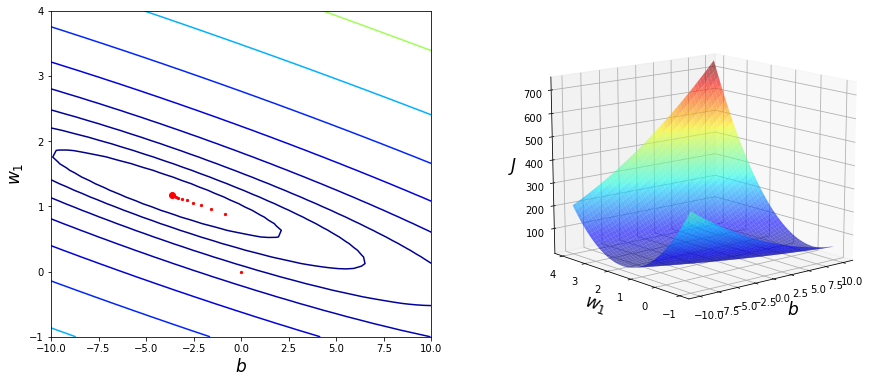

In [22]:
from lin_reg_utils import fancy_plots
fancy_plots(np.array(X), np.array(y), bs, ws, new_b, new_w)

## Multivariate Linear Regression

The time has come to consider linear regression with multiple independent variables. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. You might then realize that our new $X$ matrix will be the first two columns, house size and number of bedrooms, and our new $y$ vector will be the last column, the house price. We then want to use house size and number of bedrooms to predict the price of a house.

Let's take a look at this new data set as well.

In [23]:
#this code assumes the text file is in the same directory as the code file
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Mean Normalization
As you can see, our data take on very different values. What that means is that if we try to use gradient descent, it will take a very long time to converge because the variables in our data are on such different scales.

What we can do to overcome this issue is something called mean normalization. Defined as

##### $$ z = \frac{x-\mu}{\sigma} $$

#### where $$ \mu = \frac{1}{m}\sum_{i=1}^{m}x^{(i)}$$
#### and $$ \sigma = \sqrt{\frac{\sum_{i=1}^{m}(x^{(i)}-\mu)^2}{m}}$$

Mean normalization, also known as $z$-score calculation, subtracts the mean of the dataset, $\mu$, from each datapoint and then divides the result by the standard deviation, $\sigma$. These are very common concepts in statistics and other quantitative disciplines and torch makes it very easy. 

In [25]:
Z = torch.tensor(data2.values).to(torch.float)
Z = (Z - torch.mean(Z)) / torch.std(Z) 
X2 = Z[:, 0:2]
y2 = Z[:, 2].view(len(Z),1)

##### Note: trying to use linear regression without normalization will result in a crash because of torch's value flooding.

In [26]:
print("Dataset shape: {}".format(Z.shape))
print("X shape: {}".format(X2.shape))
print("y shape: {}".format(y2.shape))

Dataset shape: torch.Size([47, 3])
X shape: torch.Size([47, 2])
y shape: torch.Size([47, 1])


What do we need to do adapt our model to deal with the increased dimensionality of our data? Nothing! Because we implemented a fully automatic, dynamic, and vectorized implementation of linear regression with gradient descent, all we need to do is pass our functions our new $X$ matrix and $y$ vector and watch our model work its magic. Our torch implementation also works without changing a single line of code.

In [27]:
# compute cost before optimization
initial = computeCost(X2, y2)

# perform linear regression on the new data set
new_w2, new_b2, cost2, new_ws, new_bs = gradientDescent(X2, y2, alpha, iters)

# get the cost (or the loss or the error) of the model after optimization
optimized = computeCost(X2, y2, new_b2, new_w2)
print('Cost before optimization: {}'.format(initial))
print('Cost after optimization: {}'.format(optimized))

Cost before optimization: 1.075360655784607
Cost after optimization: 0.4094623625278473


In [28]:
print("optimized w2: {}".format(new_w2))
print("optimized b2: {}".format(new_b2))

optimized w2: tensor([[-0.4171],
        [-0.4657]])
optimized b2: 0.7175491452217102


Let's see how the cost function decreased on the new data set.

Text(0.5, 1.0, '$J$ decreasing on each iteration')

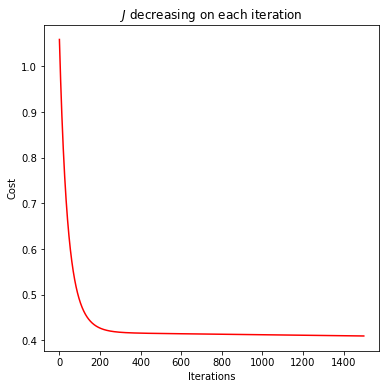

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title(r'$J$ decreasing on each iteration')

In [30]:
%%time
lin_reg2 = LinReg(X2.shape[1], 1)
lin_reg2 = lin_reg2.to(device)
house_loader = torch_dataset(X2, y2)
criterion = nn.MSELoss()
optimizer = optim.SGD(lin_reg2.parameters(), lr = alpha)
house_costs = train(lin_reg2, house_loader, criterion, optimizer)

Wall time: 2.56 s


We can double check out torch's linear regression now and make sure it's working too.

Text(0.5, 1.0, '$J$ decreasing on each iteration')

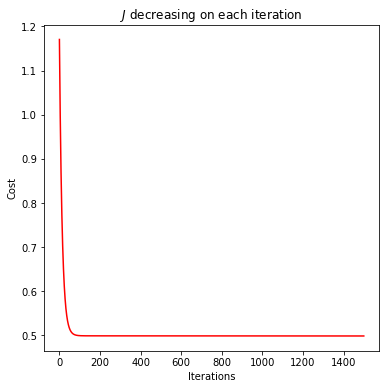

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.arange(iters), house_costs, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title(r'$J$ decreasing on each iteration')

Unfortunately, owing to the fact that the new data is of greater dimensionality and because humans can only visualize in 3 dimensions, I can't draw any other pretty pictures of the new training set to show you, dear reader. However, I hope you are satisfied with this implementation of linear regression with gradient descent. 

As mentioned above, gradient descent is an iterative algorithm, so it looks at the data many times to provide a solution. There is an alternative to gradient descent which uses an analytic, closed-form solution to find the optimized values of $w$ and $b$ without iterating over the data many times. This solution is called the normal equation and it comes from setting the partial derivatives equal to zero and solving for $w$ and $b$ directly. The detailed derivation can be found page 11 of cs229-notes1.pdf in this repo. Below I assume an alternative notation where our $w$ vector and $b$ bias term are encompassed in one parameter vector $w$. This is true if we add a column of ones to our $X$ feature matrix.

#### Normal equation solution
$$ w = (X^TX)^{-1} X^Ty $$

where $X$ is our feature matrix with a column of ones inserted at the beginning, $w$ is a parameter vector equivalent to $w$ and $b$, and $y$ is the target vector.

In [32]:
#the normal equation does not need mean normalization. resetting variables
Z = torch.tensor(data2.values).to(torch.float)
X2 = Z[:, 0:2]
ones = torch.ones(X2.shape[0], 1)
X2 = torch.cat((ones, X2),1)
y2 = Z[:, 2]

In [33]:
def normalEquation(X, y):
    
    first = torch.inverse(torch.matmul(X.T, X))
    
    second = torch.matmul(X.T, y)
    
    return torch.matmul(first, second)


Using the normal equation we can now answer the question: if a house has 1650 square feet and 3 bedrooms, how much will it cost?

In [34]:
# the one is the bias term, b, or alternatively, x_0
x = torch.tensor([1, 1650, 3], dtype=float)
w = normalEquation(X2, y2).to(float)
print("${}".format(torch.dot(x, w)))

$293081.7371520996


Great! Finally, let's compare the normal equation solution to the gradient descent solution on the first dataset so we can plot and compare them. Let's also throw in the Scikit-learn prediction for fun.

In [35]:
#add column of ones to the original X matrix and compute w
X3 = torch.cat((torch.ones((X.shape[0], 1)),X),1)
w_norm_eq = torch.squeeze(normalEquation(X3, y))
print('w from normal equation: {}'.format(w_norm_eq))

w from normal equation: tensor([-3.8958,  1.1930])


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

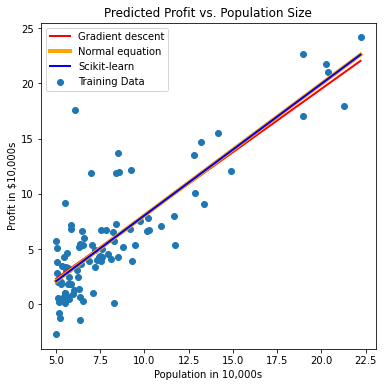

In [36]:
y_norm_eq_line = (w_norm_eq[1] * x_line) + w_norm_eq[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_line, y_line, 'r', linewidth=2.0, label='Gradient descent')
ax.plot(x_line, y_norm_eq_line, 'orange', linewidth = 4.0, label = 'Normal equation')
ax.plot(x_line, lr.intercept_+ lr.coef_* x_line, 'b', linewidth = 2.0, label = 'Scikit-learn')
ax.scatter(X, y, label='Training Data')
ax.legend()
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')

As you can see, the normal equation solution arrives at the same result as Scikit-learn. In fact, I had to increase the linewidth of the normal equation in order to make it visible on the plot. We can confirm this numerically as well.

In [37]:
print("w bias term: {}".format(w_norm_eq[0]))
print("Scikit-learn bias term: {}".format(lr.intercept_))
print("w slope term: {}".format(w_norm_eq[1], 5))
print("Scikit-learn slope term: {}".format(lr.coef_[0]))

w bias term: -3.8957786560058594
Scikit-learn bias term: -3.895780563354492
w slope term: 1.1930335760116577
Scikit-learn slope term: 1.1930336952209473


Impressive!

The normal equation can be used when the number of features, $n$, is small. When $n$ is large, the normal equation is far too slow and is therefore not widely used in modern machine learning as we are typically working in a very high feature space. I mention it here only for completeness.

And with that, we're done with linear regression. Thank you very much for reading.